In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 160)

In [2]:
description= pd.read_csv('src\columns_description - columns_description.csv')
description.head(20)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [3]:
app_df = pd.read_csv(r"src\application_data.csv")
pre_df = pd.read_csv(r"src\previous_application.csv")

In [4]:
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
pre_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [6]:
print(f"Shape of application data : {app_df.shape}")
print(f"Shape of previous application data : {pre_df.shape}")

Shape of application data : (307511, 122)
Shape of previous application data : (1670214, 37)


In [7]:
print('Columns Present in application data : \n\n', app_df.columns.tolist())

print('\n\nColumns Present in previous application data : \n\n', pre_df.columns)

Columns Present in application data : 

 ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 

In [8]:
print('Application Data')

app_df.info(max_cols=app_df.shape[1])

Application Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME

In [9]:
print('Previous Application Data')

pre_df.info(max_cols=pre_df.shape[1])

Previous Application Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMEN

In [10]:
def missing_values(df):

    data =[(col, df[col].isna().sum(), round((df[col].isna().sum()/df.shape[0])*100, 3)) for col in df.columns]
    return pd.DataFrame(data, columns=['Column_Name', 'Missing_Values', 'Percentage']).sort_values('Percentage', ascending= False)



In [11]:
print('Missing values count for Application DataFrame')
missing_values(app_df).head(50)

Missing values count for Application DataFrame


,Column_Name,Missing_Values,Percentage
76,COMMONAREA_MEDI,214865,69.872
48,COMMONAREA_AVG,214865,69.872
62,COMMONAREA_MODE,214865,69.872
70,NONLIVINGAPARTMENTS_MODE,213514,69.433
56,NONLIVINGAPARTMENTS_AVG,213514,69.433
84,NONLIVINGAPARTMENTS_MEDI,213514,69.433
86,FONDKAPREMONT_MODE,210295,68.386
68,LIVINGAPARTMENTS_MODE,210199,68.355
54,LIVINGAPARTMENTS_AVG,210199,68.355
82,LIVINGAPARTMENTS_MEDI,210199,68.355


In [12]:
print('Missing values count for Previous Application DataFrame')
missing_values(pre_df)

Missing values count for Previous Application DataFrame


,Column_Name,Missing_Values,Percentage
14,RATE_INTEREST_PRIVILEGED,1664263,99.644
13,RATE_INTEREST_PRIMARY,1664263,99.644
12,RATE_DOWN_PAYMENT,895844,53.636
6,AMT_DOWN_PAYMENT,895844,53.636
20,NAME_TYPE_SUITE,820405,49.120
36,NFLAG_INSURED_ON_APPROVAL,673065,40.298
31,DAYS_FIRST_DRAWING,673065,40.298
32,DAYS_FIRST_DUE,673065,40.298
33,DAYS_LAST_DUE_1ST_VERSION,673065,40.298
34,DAYS_LAST_DUE,673065,40.298


In [13]:
# Converting Column Name Upper Case into Lower Case 

app_df.columns = [col.lower() for col in app_df.columns]
pre_df.columns = [col.lower() for col in pre_df.columns]
pre_df.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

### Removing columns with missing values more than 50% 

In [14]:
print('Missing values count for Previous Application DataFrame')
pre_isna = missing_values(pre_df)

pre_isna

Missing values count for Previous Application DataFrame


,Column_Name,Missing_Values,Percentage
14,rate_interest_privileged,1664263,99.644
13,rate_interest_primary,1664263,99.644
12,rate_down_payment,895844,53.636
6,amt_down_payment,895844,53.636
20,name_type_suite,820405,49.120
36,nflag_insured_on_approval,673065,40.298
31,days_first_drawing,673065,40.298
32,days_first_due,673065,40.298
33,days_last_due_1st_version,673065,40.298
34,days_last_due,673065,40.298


In [15]:
pre_isna[pre_isna['Percentage'] >= 50 ]

,Column_Name,Missing_Values,Percentage
14,rate_interest_privileged,1664263,99.644
13,rate_interest_primary,1664263,99.644
12,rate_down_payment,895844,53.636
6,amt_down_payment,895844,53.636


In [16]:
col_name = pre_isna[pre_isna['Percentage'] >= 50 ]['Column_Name']

# Removing columns with missing values more than 50% In Previous Application Data

pre_df.drop(columns=col_name, axis =1, inplace = True)

pre_df.shape


(1670214, 33)

In [17]:
print('Missing values count for Application DataFrame')
app_isna = missing_values(app_df)

app_isna

Missing values count for Application DataFrame


,Column_Name,Missing_Values,Percentage
76,commonarea_medi,214865,69.872
48,commonarea_avg,214865,69.872
62,commonarea_mode,214865,69.872
70,nonlivingapartments_mode,213514,69.433
56,nonlivingapartments_avg,213514,69.433
...,...,...,...
15,name_housing_type,0,0.000
14,name_family_status,0,0.000
13,name_education_type,0,0.000
12,name_income_type,0,0.000


In [18]:
app_isna[app_isna['Percentage'] >= 50 ]

,Column_Name,Missing_Values,Percentage
76,commonarea_medi,214865,69.872
48,commonarea_avg,214865,69.872
62,commonarea_mode,214865,69.872
70,nonlivingapartments_mode,213514,69.433
56,nonlivingapartments_avg,213514,69.433
84,nonlivingapartments_medi,213514,69.433
86,fondkapremont_mode,210295,68.386
68,livingapartments_mode,210199,68.355
54,livingapartments_avg,210199,68.355
82,livingapartments_medi,210199,68.355


In [19]:
col_name = app_isna[app_isna['Percentage'] >= 50 ]['Column_Name']
print('Shape of the application DataFrame before drop the columns: ', app_df.shape, '\nNumber of columns to be Remove :', len(col_name))

# Removing columns with missing values more than 50% In Previous Application Data

app_df.drop(columns=col_name, axis =1, inplace = True)

print('Shape of the application DataFrame: ', app_df.shape)


Shape of the application DataFrame before drop the columns:  (307511, 122) 
Number of columns to be Remove : 41
Shape of the application DataFrame:  (307511, 81)


### Combining 'flag' Columns and Checking Correlation with the Target Variable

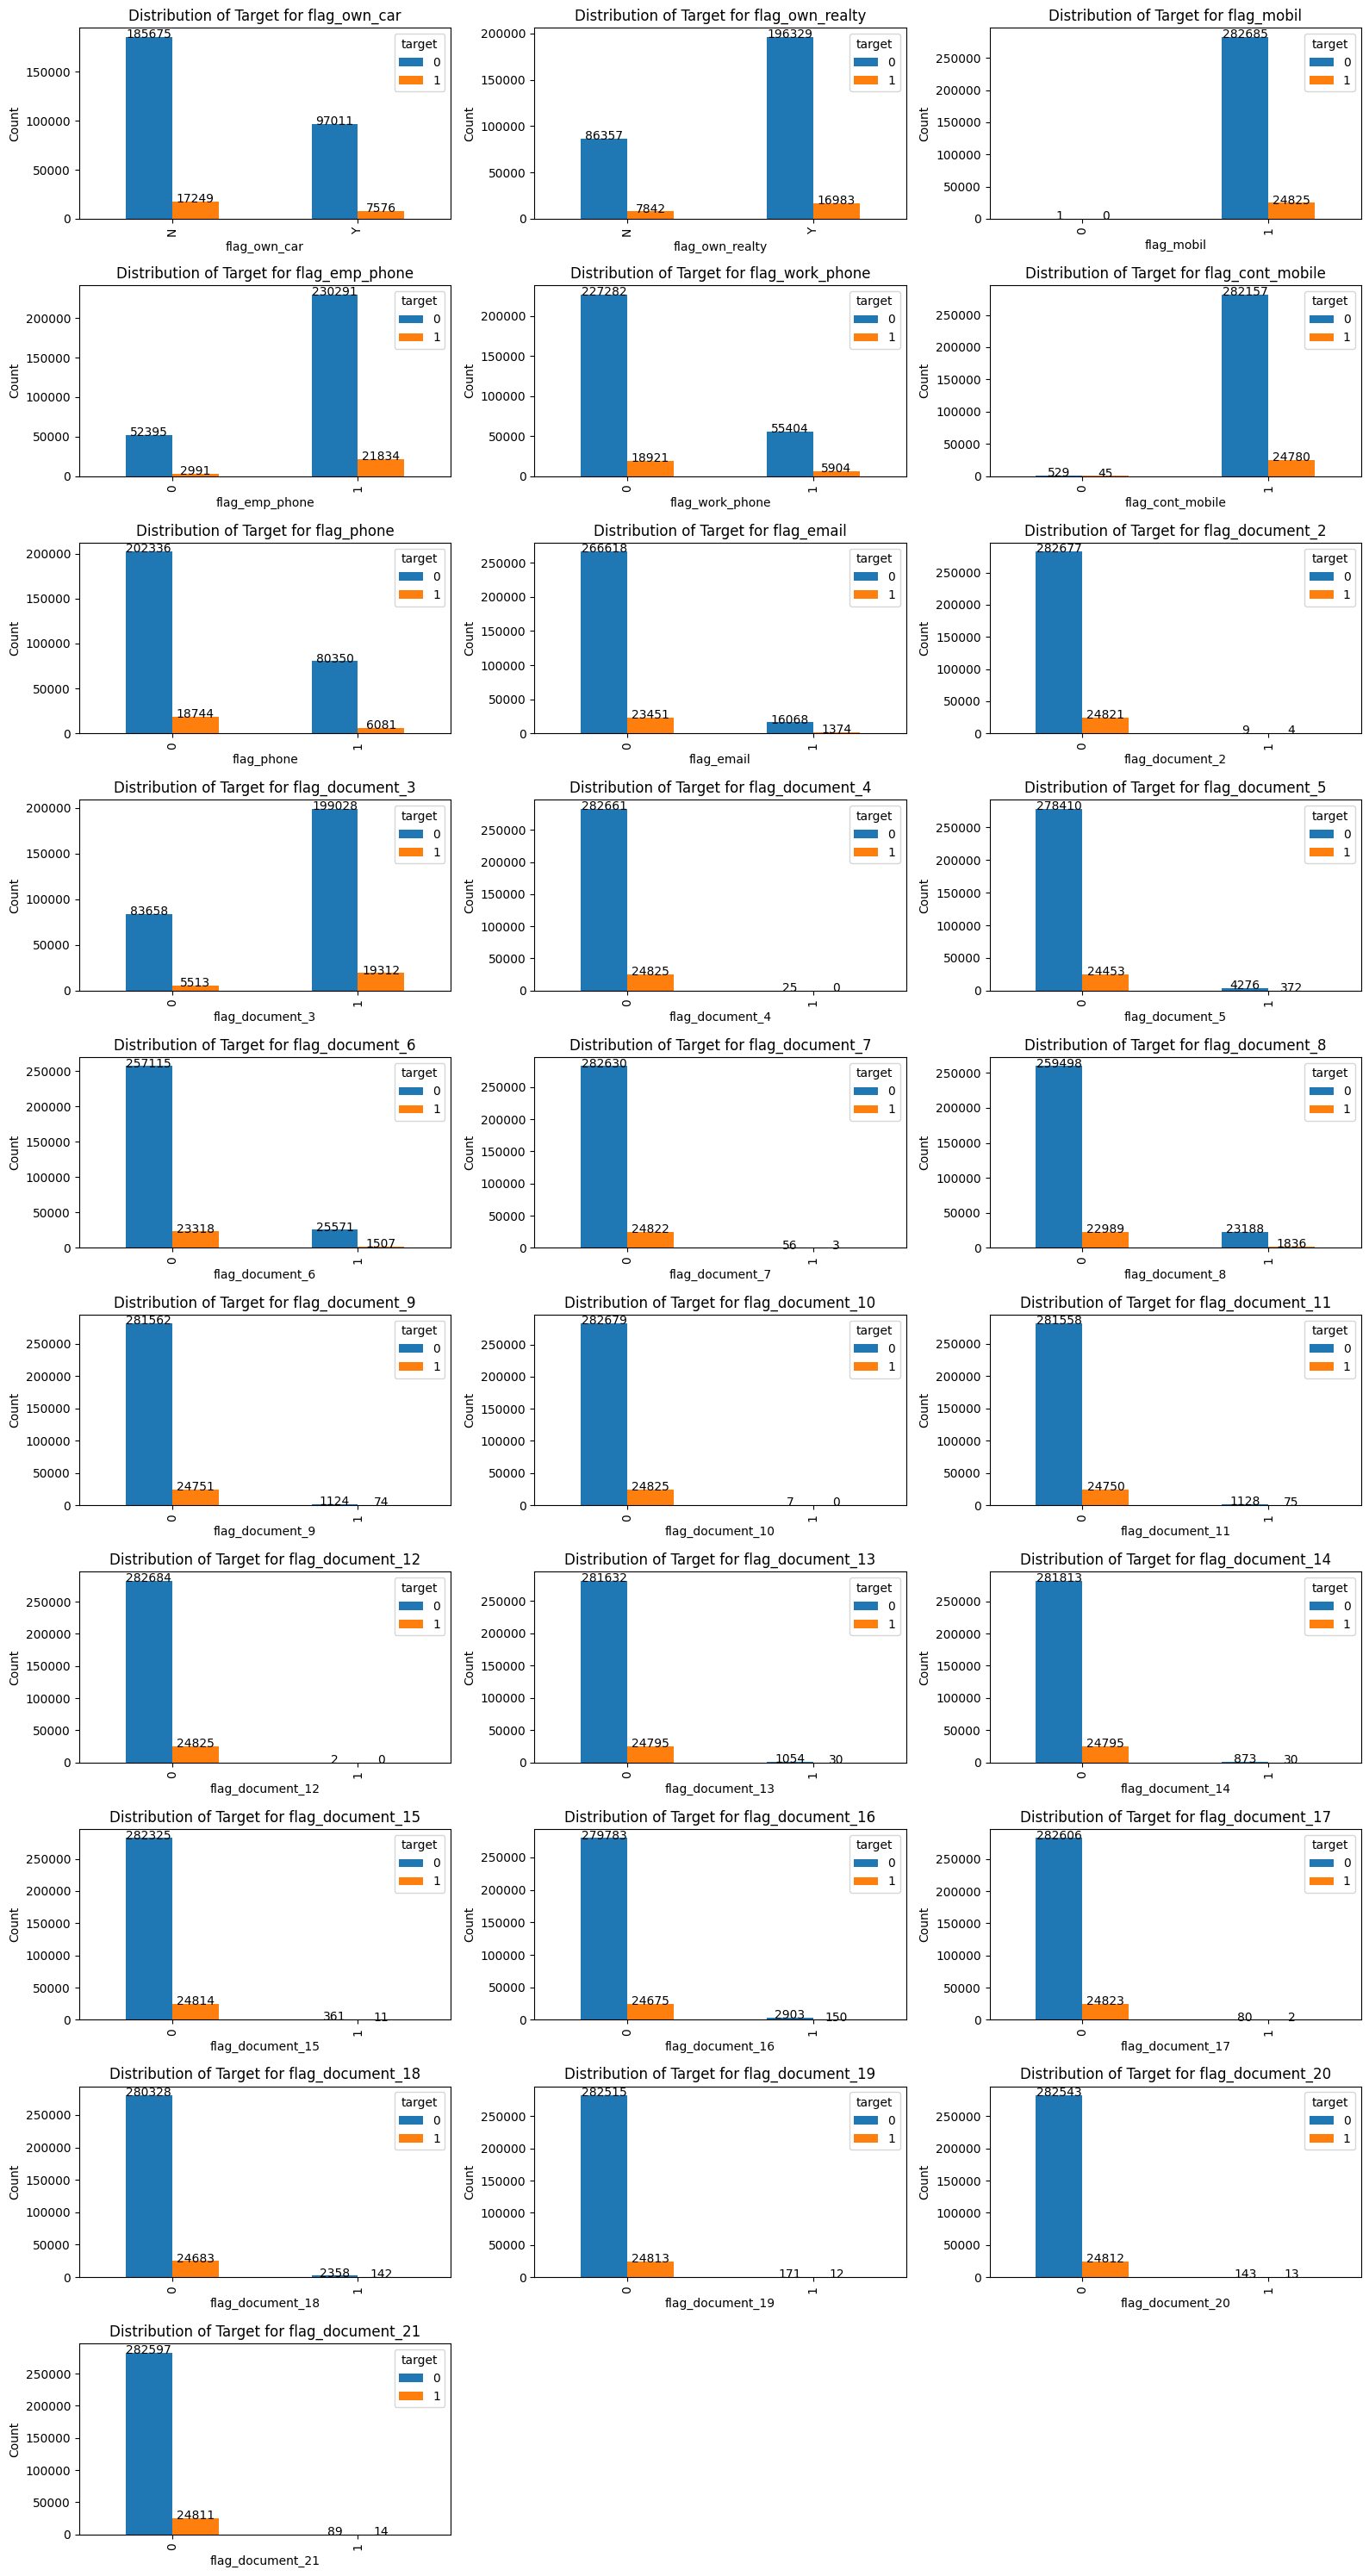

In [20]:
flag_columns = [col for col in app_df.columns if 'flag' in col]


plt.figure(figsize=(16, 30))

# Plot each 'flag' column against the target
for i, flag in enumerate(flag_columns):
    # print(i)
    plt.subplot(10, 3, i + 1)
    a = app_df.groupby([flag, 'target']).size().unstack(fill_value=0)
    a.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.title(f'Distribution of Target for {flag}')
    plt.xlabel(flag)
    plt.ylabel('Count')
    
    # Annotate the bars with the count values
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 2), textcoords='offset points')

plt.tight_layout()
plt.show()


In [21]:
# Converting Categorical values into Numerical values

for col in flag_columns:
    if app_df[col].dtype =='object':
        
        app_df[col] = app_df[col].apply(lambda x: 1 if x=='Y' else 0)

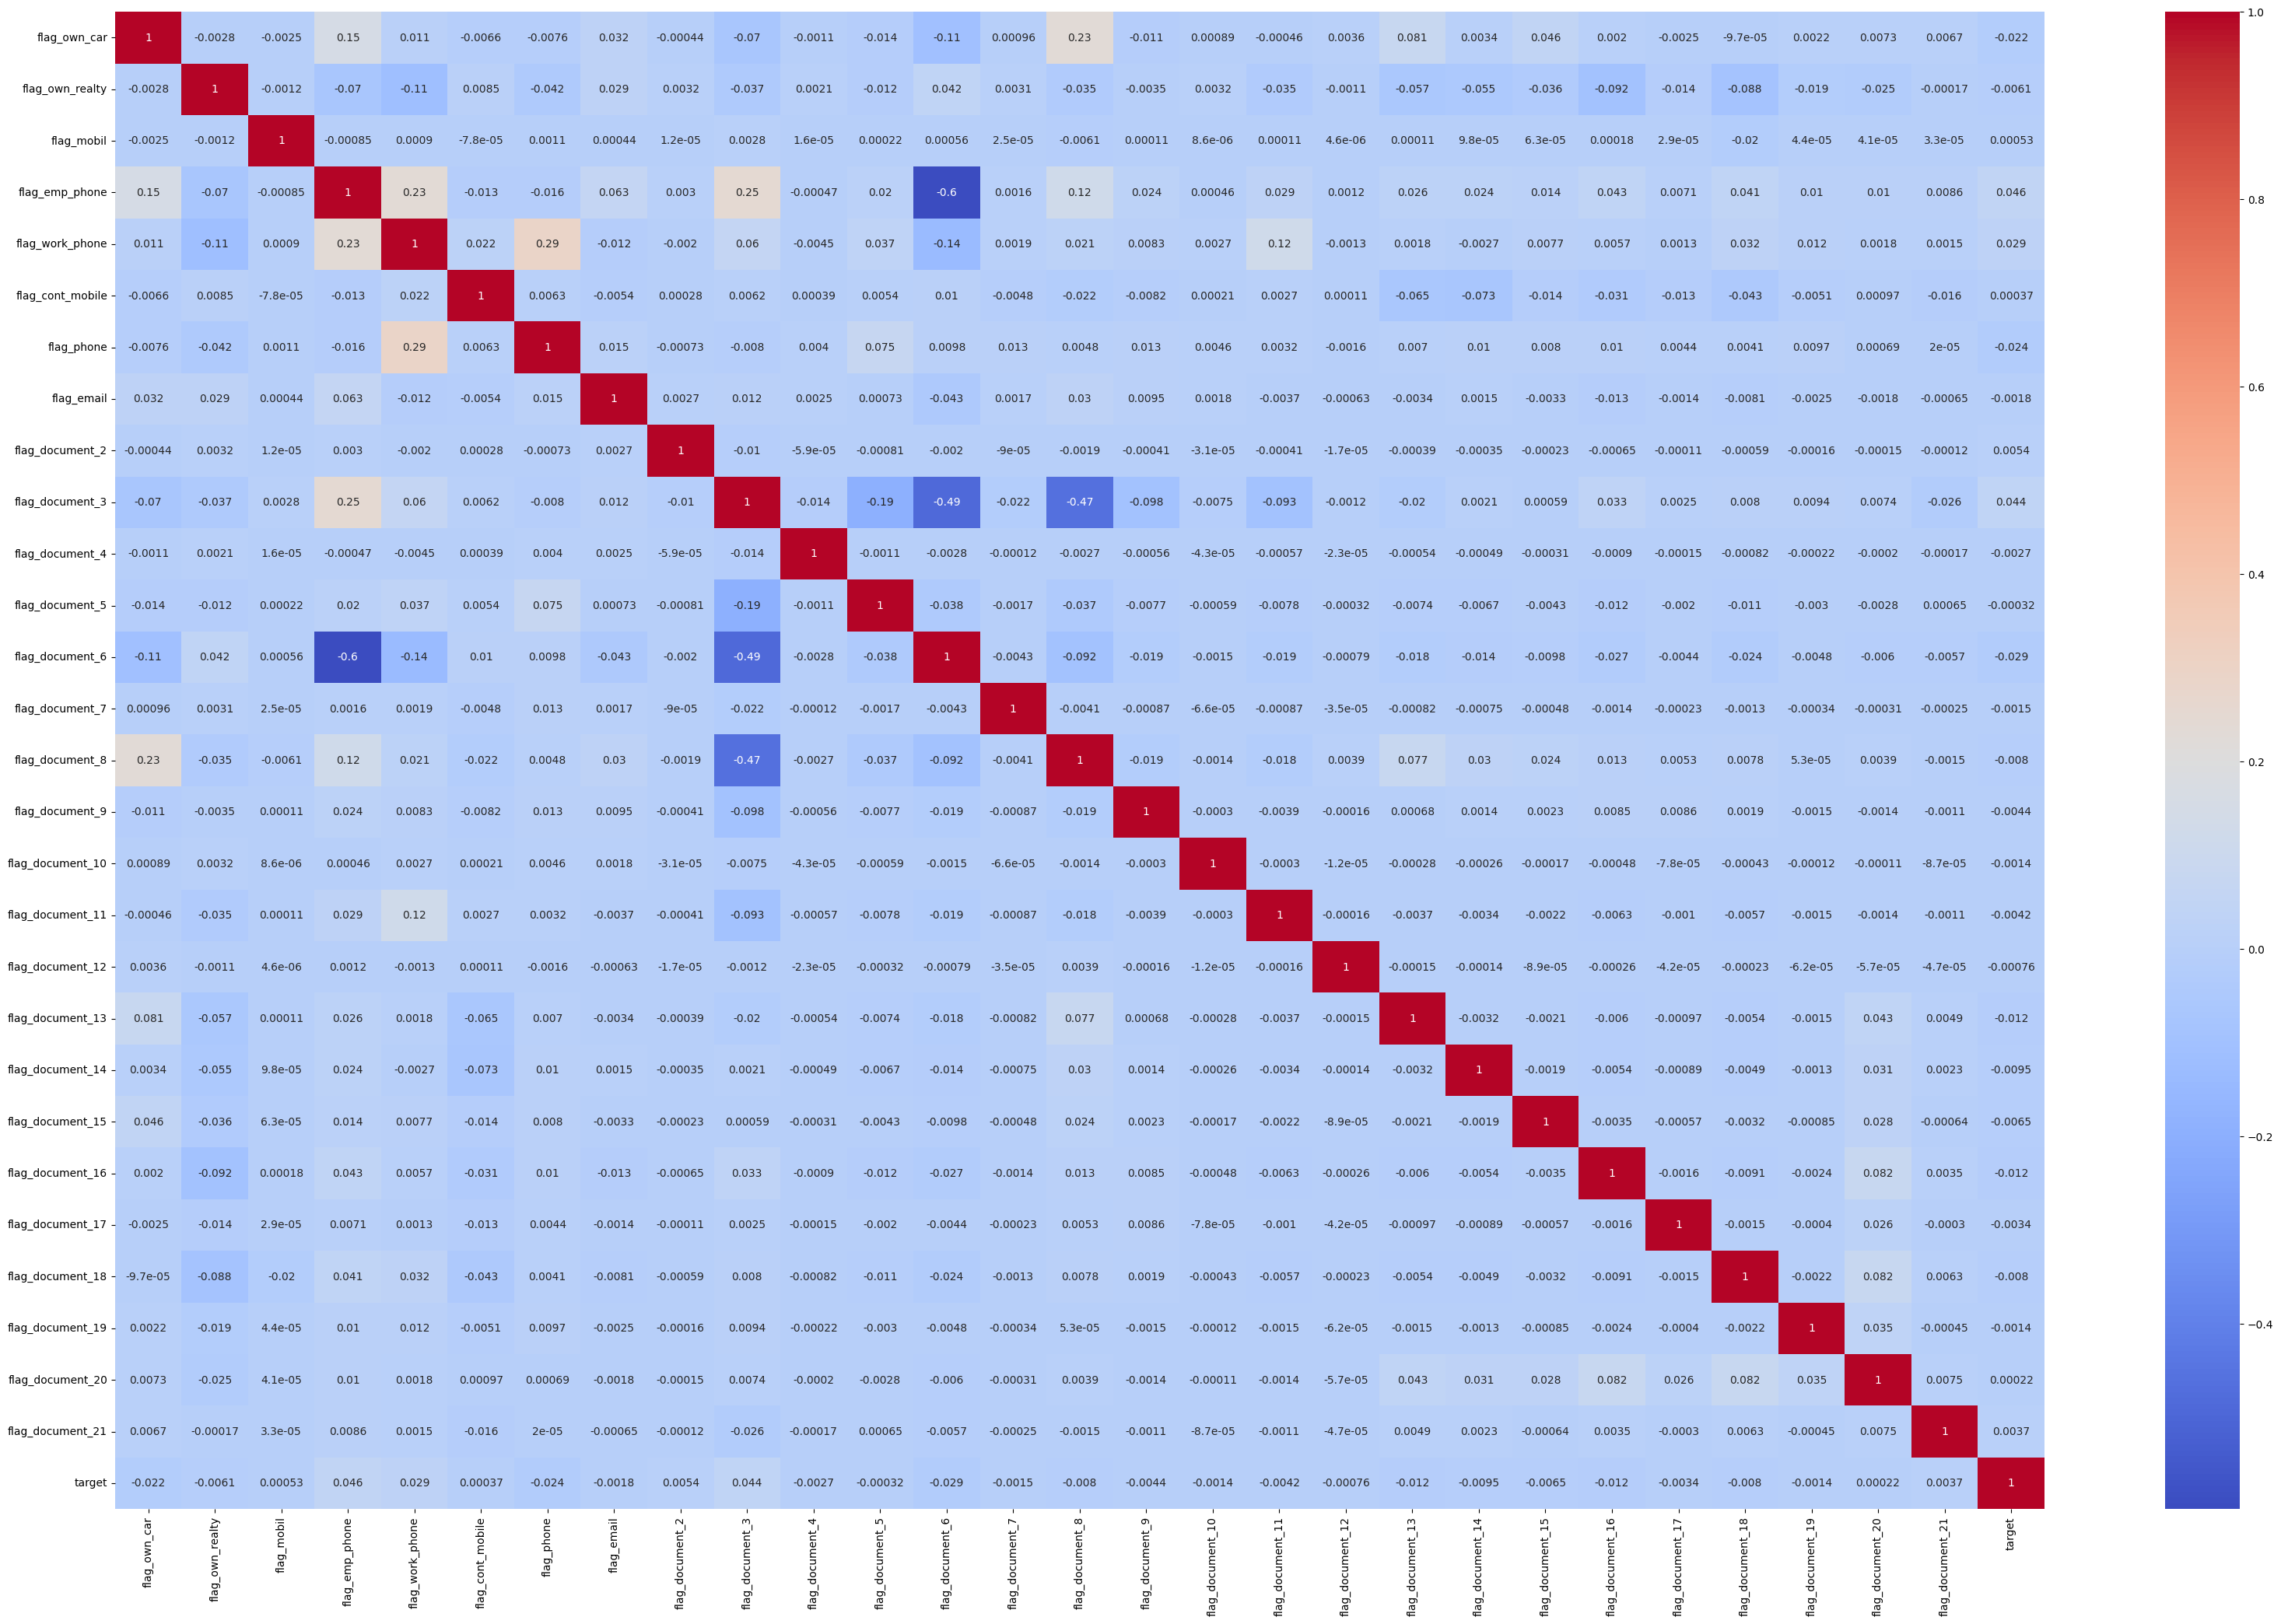

In [22]:
flag_column = [col for col in app_df.columns if 'flag' in col]
flag_column.append('target')

plt.figure(figsize=(40, 25))

sns.heatmap(data = app_df[flag_column].corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [23]:
# mobile, email and phone  flags columns are not affect the target column. We have to Remove the Columns

app_df.drop(columns=['flag_own_realty', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email'],
             axis =1, inplace = True)

In [24]:
flag_column = [col for col in app_df.columns if 'flag' in col]
len(flag_column)

21

In [25]:
# Create a new column that is the sum of all 'flag' columns
app_df['flag_document_count'] = app_df[flag_column].sum(axis=1)

In [26]:
app_df.flag_document_count.value_counts()

flag_document_count
1    189577
2     94914
0     19309
3      3629
4        82
Name: count, dtype: int64

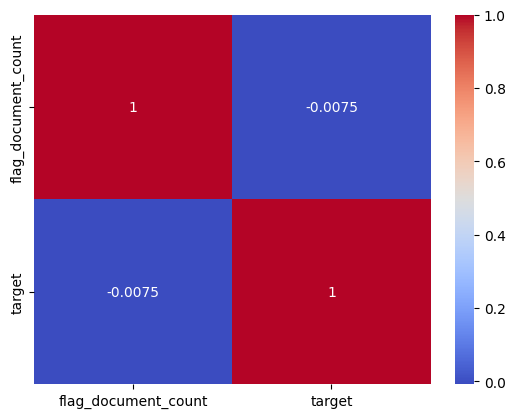

In [27]:
correlation = app_df[['flag_document_count', 'target']].corr()


# Plot the correlation heatmap for verification
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')
plt.show()

In [28]:
flag_column = [col for col in app_df.columns if 'flag_document' in col]

print('Shape of the application DataFrame before drop the Individual Flag columns: ', app_df.shape, '\nNumber of columns to be Remove :', len(flag_column))

# Removing the Individual Flag columns

app_df.drop(columns=flag_column, axis =1, inplace = True)

print('Shape of the application DataFrame: ', app_df.shape)


Shape of the application DataFrame before drop the Individual Flag columns:  (307511, 75) 
Number of columns to be Remove : 21
Shape of the application DataFrame:  (307511, 54)


### Findings: Combining 'flag' Columns and Checking Correlation with the Target Variable

#### Individual Correlation Analysis

1. **Low Individual Correlation**:
   - Each 'flag' column was correlated with the target variable individually.
   - The correlation coefficients between the individual 'flag' columns and the target were very low (approximately 0.0023).
   - This indicates that no single 'flag' column has a strong relationship with the target variable on its own.

2. **Correlation Matrix**:
   - A heatmap of the correlation matrix showed minimal correlation between each 'flag' column and the target.
   - This further confirmed that the individual 'flag' columns do not significantly impact the target variable when considered separately.

#### Combined Feature Approach

1. **Summing 'flag' Columns**:
   - To capture the collective effect of all 'flag' columns, a new column `flag_document_count` was created by summing the values of all 'flag' columns for each row.
   - This new feature aimed to represent the combined presence of all flags.

2. **Correlation of Combined Feature**:
   - The correlation between the `flag_document_count` column and the target variable was computed.
   - The resulting correlation coefficient was found to be similar to the individual correlations (around 0.017).
   - This indicates that even the combined feature does not show a strong relationship with the target variable.

### Conclusion

- The individual 'flag' columns, as well as the combined `flag_document_count` column, have very low correlation with the target variable.
- This suggests that the 'flag' columns, whether considered individually or collectively, do not have a significant impact on the target variable in this dataset.



### Findings Summary

- **Low Correlation**: Both individual 'flag' columns and the combined `flag_document_count` column exhibit very low correlation with the target variable.
- **No Significant Impact**: The analysis indicates that the 'flag' columns do not have a significant impact on the target variable, either individually or collectively.

### Converting Negative Values into Absolute Values

In [29]:
neg_values = ['days_birth', 'days_employed', 'days_registration', 'days_id_publish', 'days_last_phone_change']

app_df[neg_values].head()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [30]:
# Converting Negative values into absolute values
app_df["age"] = (abs(app_df["days_birth"])//365).astype("int8")
app_df["days_employed"] = abs(app_df["days_employed"])
app_df["days_registration"] = abs(app_df["days_registration"])
app_df["days_id_publish"] = abs(app_df["days_id_publish"])
app_df["days_last_phone_change"] = abs(app_df["days_last_phone_change"])


neg_values.append('age')
app_df[neg_values].head()

,days_birth,days_employed,days_registration,days_id_publish,days_last_phone_change,age
0,-9461,637,3648.0,2120,1134.0,25
1,-16765,1188,1186.0,291,828.0,45
2,-19046,225,4260.0,2531,815.0,52
3,-19005,3039,9833.0,2437,617.0,52
4,-19932,3038,4311.0,3458,1106.0,54


In [31]:
pre_df["days_decision"].head()

0    -73
1   -164
2   -301
3   -512
4   -781
Name: days_decision, dtype: int64

In [32]:
# Converting Negative values into absolute values
pre_df["days_decision"] = abs(pre_df["days_decision"])

pre_df["days_decision"].head()

0     73
1    164
2    301
3    512
4    781
Name: days_decision, dtype: int64

In [33]:
# We already converted 'days_birth' column into age. So we have to drop the 'days_birth' column

app_df.drop(columns = 'days_birth', axis =1, inplace = True)

In [34]:
numerical_app = app_df.select_dtypes(exclude = 'object')

categorical_app = app_df.select_dtypes(include = 'object')
categorical_app

,name_contract_type,code_gender,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,weekday_appr_process_start,organization_type,emergencystate_mode
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,No
307507,Cash loans,F,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,No
307508,Cash loans,F,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,No
307509,Cash loans,F,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,No


In [35]:
numerical_app

,sk_id_curr,target,flag_own_car,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_employed,days_registration,days_id_publish,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age
0,100002,1,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,236,8456.0,1982,1.0,1,1,15,0,0,0,0,0,0,0.681632,NaN,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,0.0,0.0,0.0,0.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,0,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,365243,4388.0,4090,1.0,2,2,8,0,0,0,0,0,0,0.115992,NaN,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,0,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,7921,6737.0,5150,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,0,0,171000.0,370107.0,20205.0,319500.0,0.005313,4786,2562.0,931,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,0.0,0.0,0.0,0.0,322.0,0.0,0.0,0.0,0.0,0.0,0.0,32


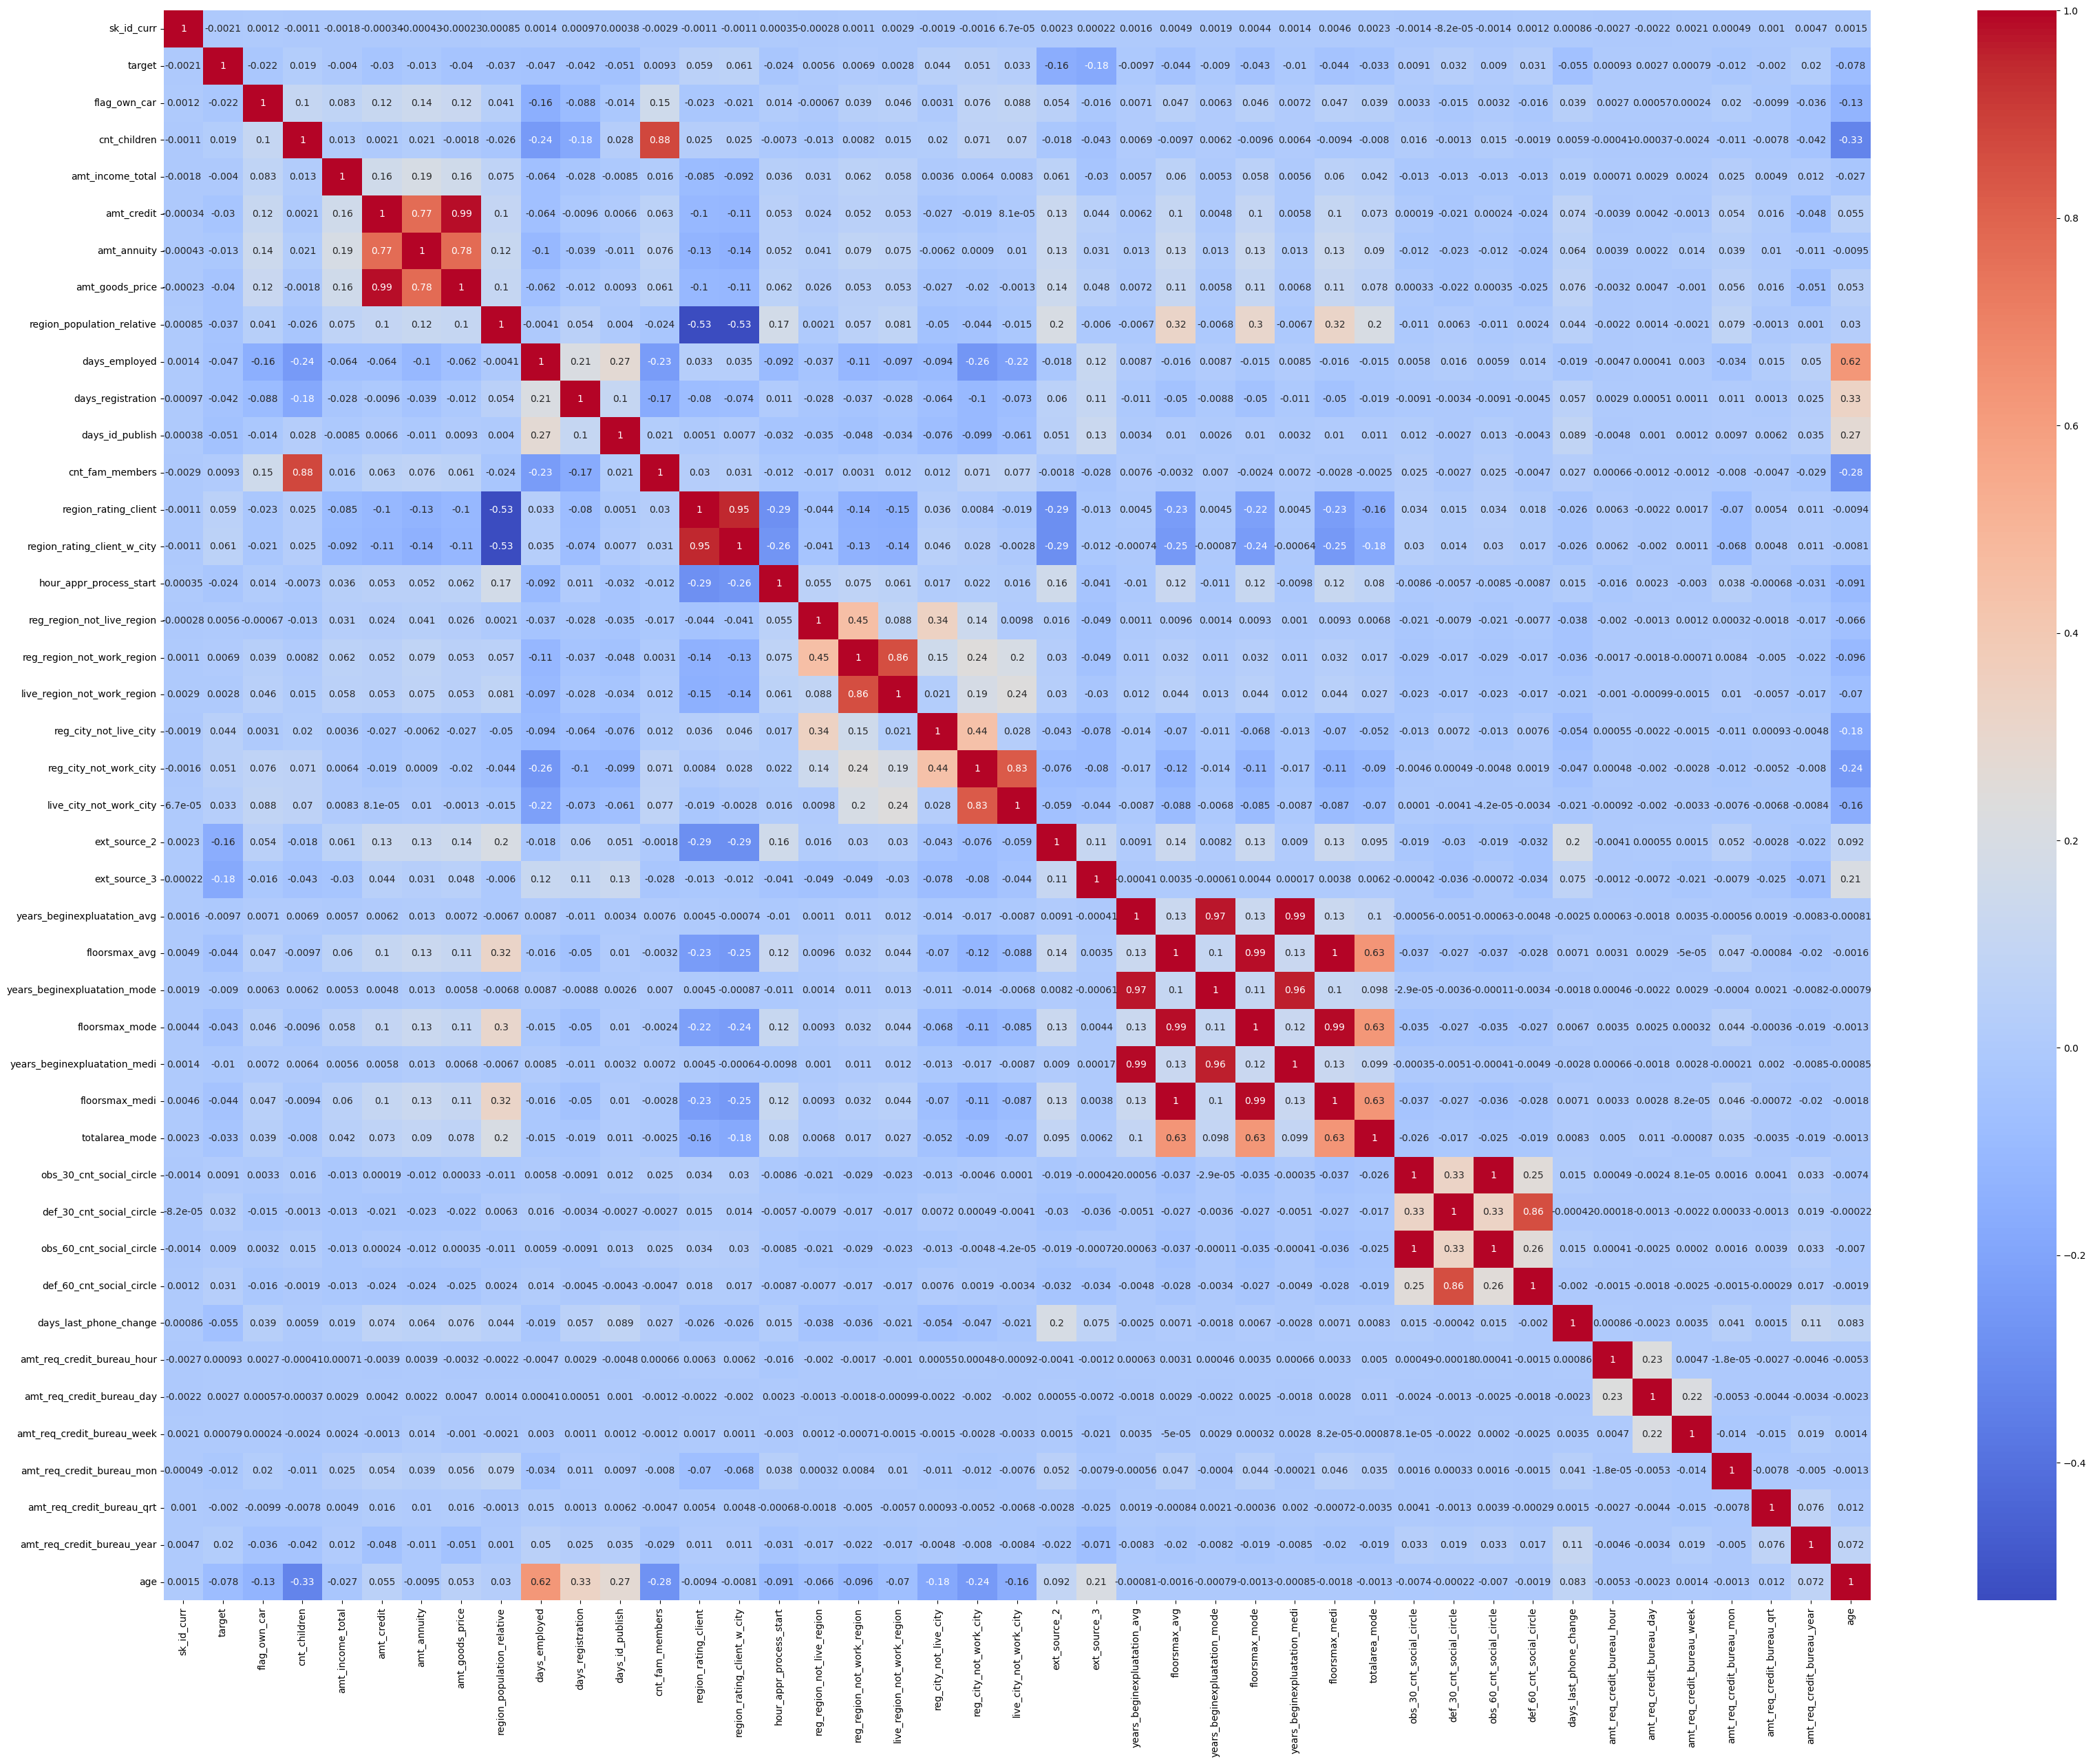

In [36]:
plt.figure(figsize=(40, 30))

sns.heatmap(data = numerical_app.corr(), annot=True, cmap = 'coolwarm')

plt.show()

**High correlation between Application Data Numerical Columns:**

AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE

LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY

REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY

CNT_CHILDREN and CNT_FAMILY_MEMBER

OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE

In [37]:
corr_col = ['amt_annuity', 'amt_credit', 'amt_goods_price', 'live_city_not_work_city', 'reg_city_not_work_city', 'region_rating_client', 
            'region_rating_client_w_city', 'cnt_children', 'cnt_fam_members',
             'obs_30_cnt_social_circle', 'obs_60_cnt_social_circle', 'def_30_cnt_social_circle', 'def_60_cnt_social_circle']

corr_col.append('target')



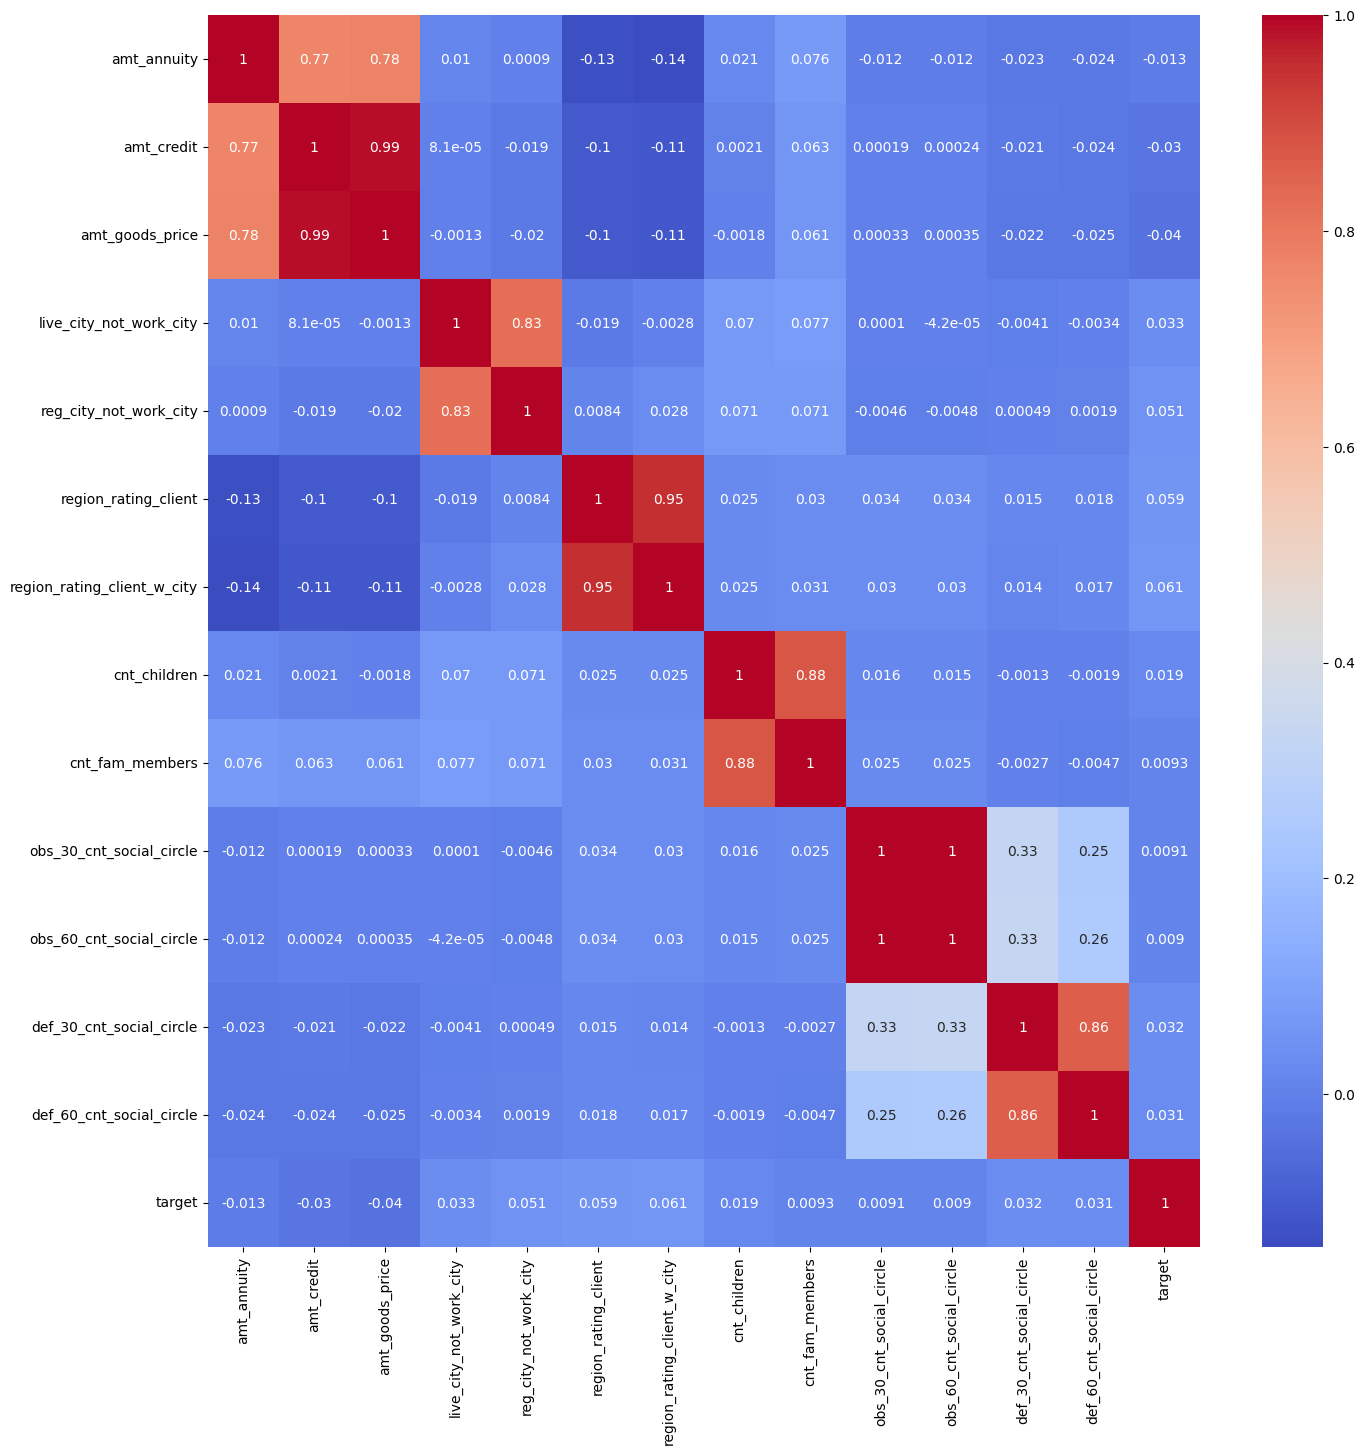

In [38]:
plt.figure(figsize=(16, 16))

sns.heatmap(data = numerical_app[corr_col].corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [39]:
numerical_app[corr_col]

,amt_annuity,amt_credit,amt_goods_price,live_city_not_work_city,reg_city_not_work_city,region_rating_client,region_rating_client_w_city,cnt_children,cnt_fam_members,obs_30_cnt_social_circle,obs_60_cnt_social_circle,def_30_cnt_social_circle,def_60_cnt_social_circle,target
0,24700.5,406597.5,351000.0,0,0,2,2,0,1.0,2.0,2.0,2.0,2.0,1
1,35698.5,1293502.5,1129500.0,0,0,1,1,0,2.0,1.0,1.0,0.0,0.0,0
2,6750.0,135000.0,135000.0,0,0,2,2,0,1.0,0.0,0.0,0.0,0.0,0
3,29686.5,312682.5,297000.0,0,0,2,2,0,2.0,2.0,2.0,0.0,0.0,0
4,21865.5,513000.0,513000.0,1,1,2,2,0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,254700.0,225000.0,0,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0
307507,12001.5,269550.0,225000.0,0,0,2,2,0,1.0,0.0,0.0,0.0,0.0,0
307508,29979.0,677664.0,585000.0,1,1,3,3,0,1.0,6.0,6.0,0.0,0.0,0
307509,20205.0,370107.0,319500.0,0,1,2,2,0,2.0,0.0,0.0,0.0,0.0,1


Based on the highest absolute correlation with the target variable, the selected features are:

- **AMT_GOODS_PRICE**: Highest absolute correlation among AMT features.
- **REG_CITY_NOT_WORK_CITY**: Higher absolute correlation compared to LIVE_CITY_NOT_WORK_CITY.
- **REGION_RATING_CLIENT_W_CITY**: Higher absolute correlation compared to REGION_RATING_CLIENT.
- **CNT_CHILDREN**: Higher absolute correlation compared to CNT_FAM_MEMBERS.
- **OBS_30_CNT_SOCIAL_CIRCLE**: Higher absolute correlation compared to OBS_60_CNT_SOCIAL_CIRCLE.
- **DEF_30_CNT_SOCIAL_CIRCLE**: Higher absolute correlation compared to DEF_60_CNT_SOCIAL_CIRCLE.

By selecting these features, we aim to retain the most informative features while reducing redundancy and potential multicollinearity in the dataset.

In [40]:
corr_min_col = ['amt_annuity', 'amt_credit', 'live_city_not_work_city', 'region_rating_client', 'cnt_fam_members', 
                'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',]

# Removing Multicollinearity columns
app_df.drop(columns = corr_min_col, axis = 1, inplace = True)


In [41]:
numerical_pre = pre_df.select_dtypes(exclude='object')
categorical_pre = pre_df.select_dtypes(include='object')
numerical_pre

,sk_id_prev,sk_id_curr,amt_annuity,amt_application,amt_credit,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,1730.430,17145.0,17145.0,17145.0,15,1,73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,25188.615,607500.0,679671.0,607500.0,11,1,164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,15060.735,112500.0,136444.5,112500.0,11,1,301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,47041.335,450000.0,470790.0,450000.0,7,1,512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,31924.395,337500.0,404055.0,337500.0,9,1,781,-1,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,267295.5,12,1,544,43,30.0,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,6622.020,87750.0,64291.5,87750.0,15,1,1694,43,12.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,11520.855,105237.0,102523.5,105237.0,12,1,1488,1370,10.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,18821.520,180000.0,191880.0,180000.0,9,1,1185,-1,12.0,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [42]:
categorical_pre

,name_contract_type,weekday_appr_process_start,flag_last_appl_per_contract,name_cash_loan_purpose,name_contract_status,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,name_seller_industry,name_yield_group,product_combination
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,Consumer loans,WEDNESDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,Furniture,low_normal,POS industry with interest
1670210,Consumer loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
1670211,Consumer loans,MONDAY,Y,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal,POS household with interest
1670212,Cash loans,WEDNESDAY,Y,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low


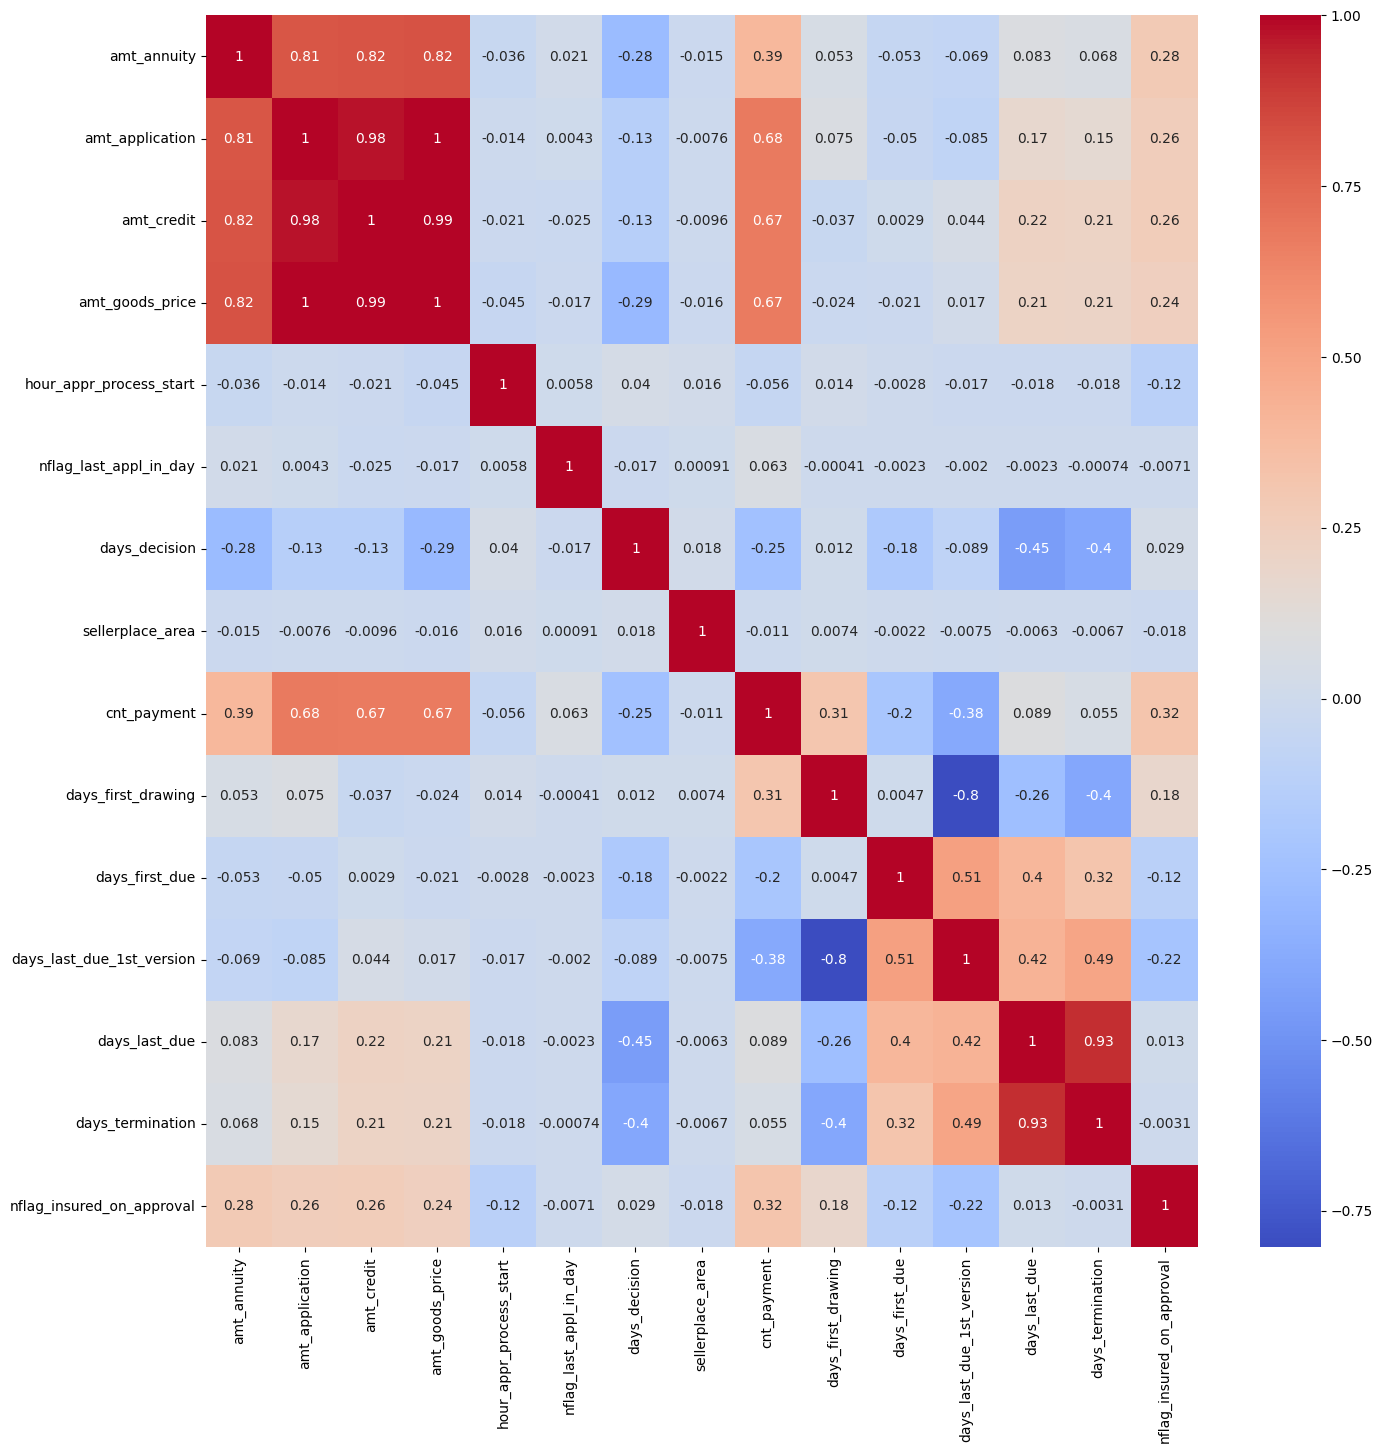

In [43]:
plt.figure(figsize=(16, 16))

sns.heatmap(data = numerical_pre.drop(columns = ['sk_id_prev', 'sk_id_curr'], axis =1).corr(), annot=True, cmap = 'coolwarm')

plt.show()

**High correlation between columns:**

AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, AMT_APPLICATION and CNT_PAYMENT

DAYS_TERMINATION AND DAYS_LAST_DUE

In [44]:
multi_colinear_col = ['amt_annuity', 'amt_credit', 'amt_goods_price', 'cnt_payment', 'days_termination']


# Removing Multicollinearity columns in Previous Application

pre_df.drop(columns = multi_colinear_col, axis = 1, inplace = True)


In [76]:
# Combining Application Data and Previous Application data as Single DataFrame

combined_df = pd.merge(left = app_df, right = pre_df, how='left', left_on='sk_id_curr', right_on='sk_id_curr')
combined_df

,sk_id_curr,target,name_contract_type_x,code_gender,flag_own_car,cnt_children,amt_income_total,amt_goods_price,name_type_suite_x,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_employed,days_registration,days_id_publish,occupation_type,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,organization_type,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,sk_id_prev,name_contract_type_y,amt_application,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite_y,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,nflag_insured_on_approval
0,100002,1,Cash loans,M,0,0,202500.0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,Laborers,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1038818.0,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,0.0
1,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1810518.0,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,1.0
2,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2636178.0,Consumer loans,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,0.0
3,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2396755.0,Consumer loans,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,1.0
4,100004,0,Revolving loans,M,1,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,Laborers,2,MONDAY,9,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1564014.0,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivit

In [77]:
similar_col = [col for col in combined_df.columns if col.endswith('_x') or col.endswith('_y')]

mapping_col ={col: col.replace('_x', '_app').replace('_y', '_prev') for col in similar_col}

combined_df.rename( columns = mapping_col, inplace = True)

# Missing Values

### Data Preprocessing: Handling Missing Values

In this section, we'll address how to handle missing values in the dataset. There are special codes used to denote missing values, which need to be handled appropriately.

### Identifying and Encoding Missing Values

1. **XNA/XAP Values**:
   - In the dataset, the values 'XNA' and 'XAP' denote missing (NA) values.
   - These values should be replaced with `NaN` to ensure they are correctly identified as missing data.

2. **Special Infinity Values in DAYS Variables**:
   - The value `365243` is used in the dataset to represent infinity in DAYS variables.
   - This value should also be replaced with `NaN` to ensure it is treated as missing data.


In [78]:
# Replace 'XNA' and 'XAP' with NaN
combined_df.replace({'XNA': np.nan, 'XAP': np.nan}, inplace=True)


In [79]:
# Replace 365243 with NaN in DAYS variables
days_columns = [col for col in combined_df.columns if 'DAYS' in col]
combined_df[days_columns] = combined_df[days_columns].replace({365243: np.nan})

combined_df

,sk_id_curr,target,name_contract_type_app,code_gender,flag_own_car,cnt_children,amt_income_total,amt_goods_price,name_type_suite_app,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_employed,days_registration,days_id_publish,occupation_type,region_rating_client_w_city,weekday_appr_process_start_app,hour_appr_process_start_app,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,organization_type,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,sk_id_prev,name_contract_type_prev,amt_application,weekday_appr_process_start_prev,hour_appr_process_start_prev,flag_last_appl_per_contract,nflag_last_appl_in_day,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite_prev,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,nflag_insured_on_approval
0,100002,1,Cash loans,M,0,0,202500.0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,Laborers,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1038818.0,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,NaN,Approved,606.0,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500.0,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,0.0
1,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1810518.0,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,NaN,Approved,746.0,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,1.0
2,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2636178.0,Consumer loans,337500.0,SUNDAY,17.0,Y,1.0,NaN,Approved,828.0,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400.0,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,0.0
3,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,2396755.0,Consumer loans,68809.5,SATURDAY,15.0,Y,1.0,NaN,Approved,2341.0,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200.0,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,1.0
4,100004,0,Revolving loans,M,1,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,Laborers,2,MONDAY,9,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1564014.0,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,NaN,Approved,815.0,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Lo

In [80]:
miss_df = missing_values(combined_df)
miss_df.head(20)

,Column_Name,Missing_Values,Percentage
54,name_cash_loan_purpose,1370742,95.846
58,code_reject_reason,1166365,81.555
63,name_product_type,916507,64.084
61,name_goods_category,813663,56.893
66,name_seller_industry,731776,51.168
59,name_type_suite_prev,711126,49.724
34,floorsmax_medi,705019,49.297
32,floorsmax_mode,705019,49.297
30,floorsmax_avg,705019,49.297
33,years_beginexpluatation_medi,691056,48.320


Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. But practically we get variables with ~50% of missing values but still, the customer insists to have it for analyzing. In those cases, we have to treat them accordingly. Here, we will remove columns with null values of more than 35% after observing those columns.

Let’s check how many columns are there with null values greater than 40%. And remove those.

In [81]:
# Identifying the Column having more than 40% missing values
col_name = miss_df[miss_df['Percentage'] >=40]['Column_Name'].to_list()

col_name.append('sk_id_prev')
print('Total No of Columns :', len(col_name), '\n', col_name)


Total No of Columns : 20 
 ['name_cash_loan_purpose', 'code_reject_reason', 'name_product_type', 'name_goods_category', 'name_seller_industry', 'name_type_suite_prev', 'floorsmax_medi', 'floorsmax_mode', 'floorsmax_avg', 'years_beginexpluatation_medi', 'years_beginexpluatation_mode', 'years_beginexpluatation_avg', 'totalarea_mode', 'emergencystate_mode', 'nflag_insured_on_approval', 'days_last_due', 'days_last_due_1st_version', 'days_first_due', 'days_first_drawing', 'sk_id_prev']


In [82]:
# Removing Columns having more than 40% missing values
combined_df.drop(columns = col_name, axis = 1, inplace = True)

print('Shape of the Combined DataFrame :', combined_df.shape, '\n\n')
combined_df

Shape of the Combined DataFrame : (1430155, 54) 




,sk_id_curr,target,name_contract_type_app,code_gender,flag_own_car,cnt_children,amt_income_total,amt_goods_price,name_type_suite_app,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_employed,days_registration,days_id_publish,occupation_type,region_rating_client_w_city,weekday_appr_process_start_app,hour_appr_process_start_app,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,age,name_contract_type_prev,amt_application,weekday_appr_process_start_prev,hour_appr_process_start_prev,flag_last_appl_per_contract,nflag_last_appl_in_day,name_contract_status,days_decision,name_payment_type,name_client_type,name_portfolio,channel_type,sellerplace_area,name_yield_group,product_combination
0,100002,1,Cash loans,M,0,0,202500.0,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,Laborers,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,Approved,606.0,NaN,New,POS,Stone,500.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,Approved,746.0,NaN,Repeater,Cash,Credit and cash offices,-1.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Consumer loans,337500.0,SUNDAY,17.0,Y,1.0,Approved,828.0,Cash through the bank,Refreshed,POS,Stone,1400.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,270000.0,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,291,Core staff,1,MONDAY,11,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45,Consumer loans,68809.5,SATURDAY,15.0,Y,1.0,Approved,2341.0,Cash through the bank,Refreshed,POS,Country-wide,200.0,middle,POS household with interest
4,100004,0,Revolving loans,M,1,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,2531,Laborers,2,MONDAY,9,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,Approved,815.0,Cash through the bank,New,POS,Regional / Local,30.0,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,0,0,157500.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,1262,5128.0,410,Laborers,1,THURSDAY,20,0,0,0,0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,787.0,0.0,0.0,0.0,2.0,0.0,1.0,46,Cash loans,229500.0,THURSDAY,12.0,Y,1.0,Approved,648.0,Cash through the bank,Repeater,Cash,Credit and cash offices,-1.0,middle,Cash X-Sell: middle
1430151,456255,0,Cash loans,F,0,0,157500.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,1262,5128.0,410,Laborers,1,THURSDAY,20,0,0,0,0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,787.0,0.0,0.0,0.0,2.0,0.0,1.0,46,Revolving loans,45000.0,SUNDAY,14.0,Y,1.0,Refused,456.0,NaN,Repeater,Cards,Country-wi

In [83]:
miss_df = missing_values(combined_df)
miss_df

,Column_Name,Missing_Values,Percentage
47,name_payment_type,539414,37.717
17,occupation_type,462731,32.355
52,name_yield_group,445652,31.161
49,name_portfolio,323667,22.632
26,organization_type,276368,19.324
28,ext_source_3,245619,17.174
32,amt_req_credit_bureau_hour,165812,11.594
33,amt_req_credit_bureau_day,165812,11.594
34,amt_req_credit_bureau_week,165812,11.594
35,amt_req_credit_bureau_mon,165812,11.594


In [87]:

# Find the mode of 'occupation_type' for each 'organization_type'
mode_occupation_type = combined_df.groupby('organization_type')['occupation_type'].agg(lambda x: x.mode())
mode_occupation_type

organization_type
Advertising                          Core staff
Agriculture                            Laborers
Bank                                 Core staff
Business Entity Type 1                 Laborers
Business Entity Type 2                 Laborers
Business Entity Type 3                 Laborers
Cleaning                         Cleaning staff
Construction                           Laborers
Culture                              Core staff
Electricity                            Laborers
Emergency                            Core staff
Government                           Core staff
Hotel                                Core staff
Housing                                Laborers
Industry: type 1                       Laborers
Industry: type 10                      Laborers
Industry: type 11                      Laborers
Industry: type 12         High skill tech staff
Industry: type 13                      Laborers
Industry: type 2                       Laborers
Industry: type 3      

In [88]:


# Function to fill missing values
def fill_missing_occupation(row):
    if pd.isna(row['occupation_type']) and not pd.isna(row['organization_type']):
        # if row['organization_type']==np.nan:
        #     print(row['organization_type'])
        return mode_occupation_type[row['organization_type']]
    else:
        return row['occupation_type']

# Apply the function to fill missing values
combined_df['occupation_type'] = combined_df.apply(fill_missing_occupation, axis=1)

In [84]:
combined_df.groupby('product_combination')['name_yield_group'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

product_combination
Card Street                              NaN
Card X-Sell                              NaN
Cash                                     NaN
Cash Street: high                       high
Cash Street: low                  low_normal
Cash Street: middle                   middle
Cash X-Sell: high                       high
Cash X-Sell: low                  low_normal
Cash X-Sell: middle                   middle
POS household with interest           middle
POS household without interest    low_action
POS industry with interest        low_normal
POS industry without interest     low_action
POS mobile with interest                high
POS mobile without interest       low_normal
POS other with interest               middle
POS others without interest       low_action
Name: name_yield_group, dtype: object

In [85]:
# Find the mode of 'name_yield_group' for each 'product_combination'
mode_yield_group = combined_df.groupby('product_combination')['name_yield_group'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Function to fill missing values
def fill_missing_yield(row):
    if pd.isna(row['name_yield_group']) and not pd.isna(row['product_combination']):

        return mode_yield_group[row['product_combination']]
    else:
        return row['name_yield_group']

# Apply the function to fill missing values
combined_df['name_yield_group'] = combined_df.apply(fill_missing_yield, axis=1)


In [89]:
miss_df = missing_values(combined_df)
miss_df

,Column_Name,Missing_Values,Percentage
47,name_payment_type,539414,37.717
52,name_yield_group,413236,28.894
49,name_portfolio,323667,22.632
26,organization_type,276368,19.324
17,occupation_type,276349,19.323
28,ext_source_3,245619,17.174
32,amt_req_credit_bureau_hour,165812,11.594
33,amt_req_credit_bureau_day,165812,11.594
34,amt_req_credit_bureau_week,165812,11.594
35,amt_req_credit_bureau_mon,165812,11.594


In [91]:
# Identifying the Column having more than 10% missing values
col_name10 = miss_df[miss_df['Percentage'] >=10]['Column_Name'].to_list()
col_name10

['name_payment_type',
 'name_yield_group',
 'name_portfolio',
 'organization_type',
 'occupation_type',
 'ext_source_3',
 'amt_req_credit_bureau_hour',
 'amt_req_credit_bureau_day',
 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'amt_req_credit_bureau_year']

In [97]:
# Filling Missing value for Categorical Columns having more than 10% missing values Based on Frequency fill

for col in [c for c in col_name10 if c != 'ext_source_3']:
    # finding the Probability of the Distribution
    probability = combined_df[col].value_counts(normalize=True)

    missing_values_size = combined_df[col].isna().sum()

    # Filling missing values based on Frequency using the random choice
    combined_df.loc[combined_df[col].isna(), col] = np.random.choice(probability.index,
                                                                    p = probability.values, 
                                                                    size = missing_values_size)



In [99]:
# Filling Missing value for Numerical Columns having more than 10% missing values Based columns mean value

combined_df['ext_source_3'].fillna(combined_df['ext_source_3'].mean(), inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12444\3656143540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['ext_source_3'].fillna(combined_df['ext_source_3'].mean(), inplace = True)


In [103]:
miss_df =missing_values(combined_df)
miss_df

,Column_Name,Missing_Values,Percentage
48,name_client_type,17997,1.258
53,product_combination,16767,1.172
39,name_contract_type_prev,16767,1.172
51,sellerplace_area,16454,1.151
50,channel_type,16454,1.151
46,days_decision,16454,1.151
45,name_contract_status,16454,1.151
44,nflag_last_appl_in_day,16454,1.151
43,flag_last_appl_per_contract,16454,1.151
42,hour_appr_process_start_prev,16454,1.151


When dealing with missing values in a dataset, it's a common practice to drop rows with missing values if the proportion of missing values in the column is very low (e.g., less than 1.5 %). 

In [104]:
miss_df[miss_df['Percentage'] > 0]['Column_Name']

48                   name_client_type
53                product_combination
39            name_contract_type_prev
51                   sellerplace_area
50                       channel_type
46                      days_decision
45               name_contract_status
44             nflag_last_appl_in_day
43        flag_last_appl_per_contract
42       hour_appr_process_start_prev
41    weekday_appr_process_start_prev
40                    amt_application
8                 name_type_suite_app
29           obs_30_cnt_social_circle
30           def_30_cnt_social_circle
27                       ext_source_2
7                     amt_goods_price
3                         code_gender
Name: Column_Name, dtype: object

In [108]:
print('Shape of the Combined DataFrame: ', combined_df.shape )
combined_df.dropna(inplace= True)

print('After droping Missing Value Rows, Shape of the Combined DataFrame: ', combined_df.shape )

Shape of the Combined DataFrame:  (1430155, 54)
After droping Missing Value Rows, Shape of the Combined DataFrame:  (1403317, 54)


In [109]:
missing_values(combined_df)

,Column_Name,Missing_Values,Percentage
0,sk_id_curr,0,0.0
40,amt_application,0,0.0
29,obs_30_cnt_social_circle,0,0.0
30,def_30_cnt_social_circle,0,0.0
31,days_last_phone_change,0,0.0
32,amt_req_credit_bureau_hour,0,0.0
33,amt_req_credit_bureau_day,0,0.0
34,amt_req_credit_bureau_week,0,0.0
35,amt_req_credit_bureau_mon,0,0.0
36,amt_req_credit_bureau_qrt,0,0.0


In [112]:
# Saving Combined DataFrame into CSV file

combined_df.to_csv('src/combined_cata.csv', index = False)